<h1 style="font-size:30px;">Assignment: Implement a CNN for Image Classification</h1>

In the previous notebooks we have seen how to implement the LeNet5 CNN model. We trained the LeNet5 model on the MNIST and Fashion MNIST dataset. 

In this assignment, you will implement a CNN Model for classifying objects either in the `CIFAR10` or the `CIFAR100` dataset. You can choose either of the two datasets. Although CIFAR10 is a relatively easy dataset to work with for image classification, if you are particularly looking for a challenge, then `CIFAR100` would be the right choice for you. 

The CIFAR10 dataset has the following properties
1. It has `10` classes.  
1. It has colored images, so it has `3-channels`. 
1. The image shape is `32 x 32`.

The CIFAR100 dataset has the following properties
1. It has `100` classes.  
1. It has colored images, so it has `3-channels`. 
1. The image shape is `32 x 32`.

<table>
        <th><center><img src="https://www.learnopencv.com/wp-content/uploads/2020/01/c3_w3_cirar10.png"/></center></th>
        <th><center><img src="https://learnopencv.com/wp-content/uploads/2022/02/c4-03-19-cifar-100-plotting-01.png"/></center></th>
        <tr>
            <th><center>CIFAR10</center></th>
            <th><center>CIFAR100</center></th>
        </tr>
</table>

## <font style="color:rgb(50,120,230)">Marking scheme</font>

### Maximum Points: 30

<div>
    <table>
        <tr><td><h3>Section</h3></td> <td><h3>Problem</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>3.1</h3></td> <td><h3>Find Mean and Std of Training Data</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>Training Configuration to Achieve Accuracy</h3></td> <td><h3>15</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>Implement the CNN Model</h3></td> <td><h3>10</h3></td> </tr>
    </table>
</div>

## Problem Description

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">1. Implement the CNN Model</font>

**For CIFAR10 dataset:**
Since the task is to classify objects in a dataset of color images, you need to implement a CNN with 10 output classes. **Also, your model must use `Conv2D`, `BatchNormalization`, and `ReLU` activation.** 

**For CIFAR100 dataset:**
For the CIFAR100 dataset, you need to implement a CNN with 100 output classes. **Also, your model must use `Conv2D`, `BatchNormalization`, and `ReLU` activation.** 

**You need to define the model architecture in the function: `MyModel`**

Hint: For color images you need to use an input shape that has three channels, so that it accepts 3 channel inputs.

### <font style="color:rgb(50,120,230)">2. Find Mean and Std of Training Data</font>

It is a good practice to normalize the training data. To normalize the data, we need to compute mean and std. As the dataset has colored images, it has `3-channel` (RGB or BGR). We have to find mean and std per channel using training data. 

**You need to compute the mean and standard deviation for the dataset in the function: `get_mean_std_train_data`**

### <font style="color:rgb(50,120,230)">3. Model Training and Accuracy</font>

Once you have defined the model, you can train it. To get better accuracy, you need to experiment with the training configuration and even the model architecture. You can check the accuracy by running the training loop.

Here are a few hints on how you can improve the accuracy:
- Train for larger number of epochs
- Try using different learning rates
- Try to add more convolutional layers to the architecture
- Try to add more nodes in the layers.

**For the CIFAR10 dataset:**
You need to achieve **75% accuracy** in order to get full marks for this part. 

**For the CIFAR100 dataset:**
You need to achieve **50% accuracy** in order to get full marks for this part. 

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Note that this notebook requires you to change a few things in the model to get the desired accuracy. Therefore you need train the model from scratch. This can be time consuming.

**Especially, if you choose to use the CIFAR100 dataset, then you will need to build a relatively larger model with more parameters. For this part, a GPU machine will be very helpful for faster training.**

You can execute this notebook in Google-Colab so that you have access to a GPU-machine and prototype faster. Once the desired results are acheived, you can copy-paste the changes made in the Colab-notebook to this notebook so that the grading occurs on the latest code. 

If you use Google Colab, kindly upload your model under a new folder named **`models`**.

You can access the Colab-notebook from <a href="https://colab.research.google.com/drive/1BQak8DXnkJfWf-L8qokJvGOTarzz_q4E" target=_blank>here</a>.

In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from dataclasses import dataclass

from tensorflow.keras.utils import to_categorical

block_plot = False

import ssl

## 1 System Configuration

In [2]:
def system_config():
    
    # Get list of GPUs.
    gpu_devices = tf.config.list_physical_devices('GPU')
    print(gpu_devices)
    
    if len(gpu_devices) > 0:
        print('Using GPU')
        os.environ["CUDA_VISIBLE_DEVICES"] = '0'
        os.environ['TF_CUDNN_DETERMINISTIC'] = '1' 
        
        # If there are any gpu devices, use first gpu.
        tf.config.experimental.set_visible_devices(gpu_devices[0], 'GPU')
        
        # Grow the memory usage as it is needed by the process.
        tf.config.experimental.set_memory_growth(gpu_devices[0], True)
        
        # Enable using cudNN.
        os.environ['TF_USE_CUDNN'] = "true"
    else:
        print('Using CPU')
        
    os.makedirs('models', exist_ok=True)

system_config()

[]
Using CPU


## 2 Dataset 

### 2.1 Select Dataset

In [3]:
dataset_choice = {
    'cifar10': 1,
    'cifar100': 2
}

**In the next code block, you need to specify which dataset you would like to use.**

To choose `cifar10`:
```python
dataset = dataset_choice['cifar10']
```
Or, to choose `cifar100`:
```python
dataset = dataset_choice['cifar100']
```

In [4]:
dataset = dataset_choice['cifar10']
print(f"Choosen dataset: {dataset}")

Choosen dataset: 1


In [5]:
if dataset == 1:
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
else:
    class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm']

### 2.2 Load the Dataset

In [6]:
def get_data(dataset=1):
    
    if dataset == 1:
        cifar10 = tf.keras.datasets.cifar10
        (train_images, train_labels), (valid_images, valid_labels) = cifar10.load_data()
        train_labels = train_labels.reshape(50000)
        valid_labels = valid_labels.reshape(10000)
    else:
        cifar100 = tf.keras.datasets.cifar100
        (train_images, train_labels), (valid_images, valid_labels) = cifar100.load_data()
        train_labels = train_labels.reshape(50000)
        valid_labels = valid_labels.reshape(10000)
        
    return (train_images, train_labels), (valid_images, valid_labels)

In [7]:
# Get the dataset.
(X_train_0, y_train_0), (X_valid_0, y_valid_0) = get_data(dataset)

### 2.3 Display Sample Images

In [8]:
def display_sample_images(X):
    plt.figure(figsize=(20, 15))
    
    num_rows = 5
    num_cols = 6
    for idx in range(num_rows*num_cols):
        plt.subplot(num_rows, num_cols, idx+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[idx])
        
    plt.show(block=block_plot)

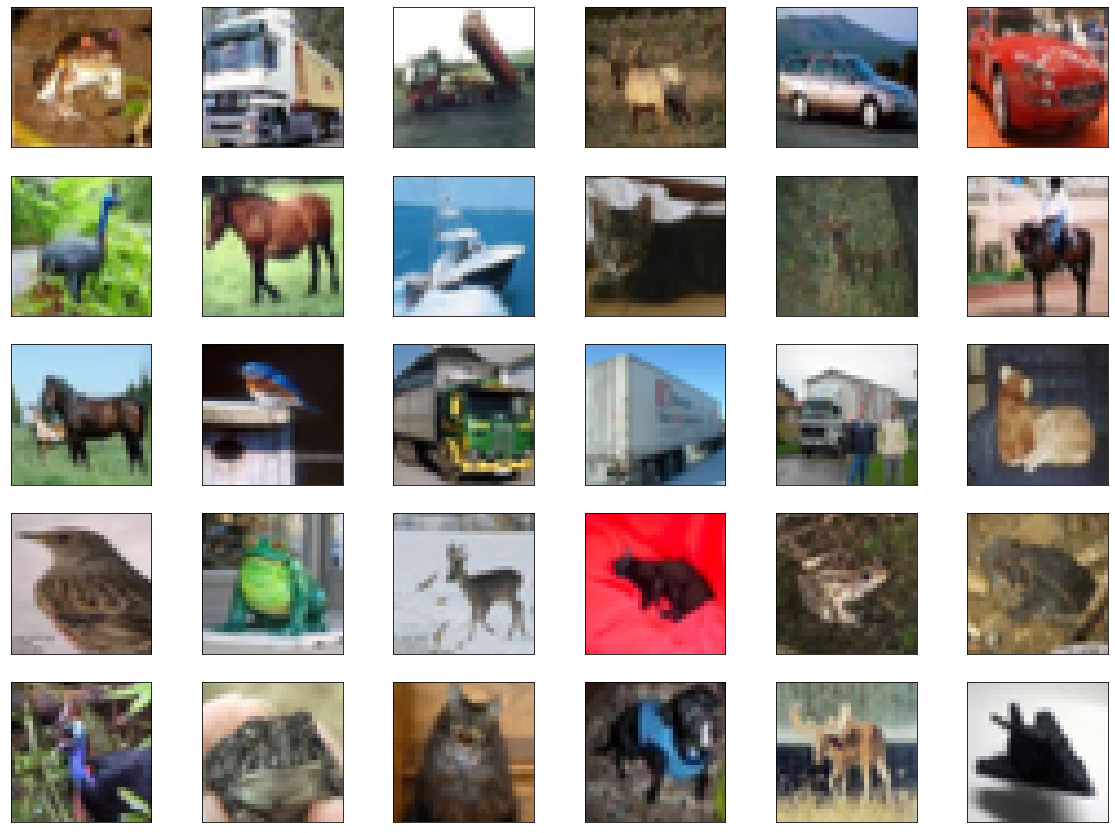

In [9]:
display_sample_images(X_train_0)

## 3 Dataset Preprocessing

### 3.1 Function to Get Mean and Standard Deviation [5 points]
This function should return the mean and standard deviation of the training data. This wil be used further below in the dataset preprocessing function to normalize the data.

In [10]:
def get_mean_std_train_data(train_data):
    
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    
    ###
    ### YOUR CODE HERE
    mean = np.mean(train_data, axis=(0,1,2))/255.0
    std = np.std(train_data, axis=(0,1,2))/255.0
    ###
    
    return mean, std

In [11]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### 3.2 Dataset Preprocessing
Let's preprocess the data. This includes:
* Changing the labels to categorical type.
* And normalizing the pixels by dividing by 255.0.

In [12]:
def preprocess_dataset(train_set, valid_set, num_classes=3, seed=3):

    (X_train, y_train) = train_set
    (X_valid, y_valid) = valid_set
    
    X_train = X_train.astype(np.float32)
    X_valid = X_valid.astype(np.float32)
    
    mean, std = get_mean_std_train_data(X_train)
    
    # Changing range of pixel values from [0 - 255] to [0. - 1.0].
    X_train = X_train / 255.0
    X_valid = X_valid / 255.0
    
    X_train = (X_train - mean) / std
    X_valid = (X_valid - mean) / std
    
    if len(X_train.shape) != 4:
        X_train = tf.expand_dims(X_train, axis=3)
        X_valid = tf.expand_dims(X_valid, axis=3)
        
        
    n_train = X_train.shape[0]
    n_valid = X_valid.shape[0]

    n_classes = len(np.unique(y_train))

    image_shape = X_train[0].shape

    print("There are {} training examples ".format(n_train))
    print("There are {} validation examples".format(n_valid))
    print("Image data shape is {}".format(image_shape))
    print("There are {} classes".format(n_classes))
    
     # Confirm number of classes present in the dataset matches the specified number of classes.
    assert num_classes == len(
        np.unique(y_train)
    ), "Number of classes present in the dataset does not match specified nuber of classes."
    
    print('There are {} classes'.format(num_classes))

    if len(y_train.shape) != 2:
        y_train = to_categorical(y_train, num_classes)
        y_valid = to_categorical(y_valid, num_classes)
    print(f"\n\nX_train: {X_train.shape}, Y_train: {y_train.shape}")
    print(f"X_validation: {X_valid.shape}, Y_valid: {y_valid.shape}")
    

    return (X_train, y_train), (X_valid, y_valid)

In [13]:
@dataclass(frozen=True)
class DatasetConfig:
    CHANNELS:   int = 3
    if dataset == 1:
        NUM_CLASSES: int = 10
    else:
        NUM_CLASSES: int = 100
            
dataset_config = DatasetConfig()

In [14]:
# Preprocess dataset.
((X_train, y_train), 
 (X_valid, y_valid)) = preprocess_dataset((X_train_0, y_train_0),
                                          (X_valid_0, y_valid_0),
                                          num_classes=dataset_config.NUM_CLASSES,
                                          )

There are 50000 training examples 
There are 10000 validation examples
Image data shape is (32, 32, 3)
There are 10 classes
There are 10 classes


X_train: (50000, 32, 32, 3), Y_train: (50000, 10)
X_validation: (10000, 32, 32, 3), Y_valid: (10000, 10)


## 4 Training Configuration Setup [15 Points]
All training parameters are defined here. So, 
this is where you can improve your accuracy, apart from improving the architecture. 

Here are a few hints on how you can improve the accuracy:
- Train for a larger number of epochs
- Try different learning rates

**You need to achieve 75% accuracy for CIFAR10 or 50% accuracy for CIFAR100 in order to get full marks for this portion of the assignment.**

**You will see the effect of these changes when you run Step 7**

In [15]:
is_training = True

In [16]:
@dataclass(frozen=True)
class TrainingConfig:
    ### DO NOT EDIT THESE
    BATCH_SIZE:       int = 32   # Amount of data to pass through the network at each forward-backward iteration.
    EPOCHS:           int = 1    # Number of times the whole dataset will be passed through the network.
    LEARNING_RATE:  float = 0.1  # The learning rate that is applied to the gradient during back-propagation.
        
    # Change the batch size, epochs, and learning rate here if you intend to do so.
    ###
    ### YOUR CODE HERE
    BATCH_SIZE = 32
    EPOCHS = 20
    LEARNING_RATE = 0.01
    ###
    
training_config = TrainingConfig()

## 5 CNN Model Architecture [10 Points]
You have to write the model code here. You can take reference from LeNet code.

If you do not get higher accuracy, here are a few hints:

* Try to add more convolutional layers to the architecture
* Try to add more nodes in the layers.

In [49]:
def MyModel(input_shape=(32, 32, 3), num_classes=10, print_summary=True):   
    
    ###
    ### YOUR CODE HERE
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    ###
    
    if print_summary:
        print(model.summary())
    return model

In [50]:
def LeNet5_model(num_classes, shape, print_model_summary=True):

    inputs = Input(shape=shape)
    
    # -------------------------------------
    # First convolutional Layer + pooling
    # -------------------------------------
    x = Conv2D(6, 5, padding='valid')(inputs)              # input size = (32, 32), output size = (28, 28)
    x = Activation("relu")(x)                              # output size = (28, 28)
    x = MaxPool2D()(x)                                     # output size = (14, 14)

    
    # -------------------------------------
    # Second convolutional layer + pooling 
    # -------------------------------------
    x = Conv2D(16, 5, padding='valid')(x)                  # input size = (14, 14), output size = (10, 10)
    x = Activation('relu')(x)                              # output size = (10, 10)
    feature_extractor_output = MaxPool2D()(x)              # output size = (5, 5)

    
    # Flatten.
    flattened = Flatten()(feature_extractor_output)        # 5 * 5 * 16 -> 400

    # ------------------------- 
    # Fully connected layers.
    # -------------------------
    x = Dense(120, activation='relu')(flattened)           # 400 -> 120
    x = Dense(84, activation='relu')(x)                    # 120 -> 84
    
    # Softmax output layer.
    headout = Dense(num_classes, activation="softmax")(x)  # 84 -> 10
    
    # Create model.
    model = Model(inputs=inputs, outputs=headout, name='LeNet5')
    
    if print_model_summary:
        model.summary()
        
    return model

In [51]:
# Initialize the CNN Model.
my_model = MyModel(num_classes=dataset_config.NUM_CLASSES,
                   print_summary=False,
                   )

In [52]:
model_summary = my_model.summary()
print(model_summary)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                      

In [53]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [54]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [55]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## 6 Model Training

In [56]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [57]:
if is_training:
    
    if dataset == 1:
        checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("models/cifar10_cnn_model.h5", monitor= "val_accuracy",
                                                       save_best_only=True, mode= "max")
    else:
        checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("models/cifar100_cnn_model.h5", monitor= "val_accuracy",
                                                       save_best_only=True, mode= "max")
    # Compile the model.
    my_model.compile(tf.keras.optimizers.SGD(learning_rate=training_config.LEARNING_RATE, momentum=0.9),
                 loss=tf.keras.losses.CategoricalCrossentropy(),
                 metrics=["accuracy"],
                )

    # Train the model.
    training_results = my_model.fit(X_train,
                                    y_train,
                                    epochs=training_config.EPOCHS,
                                    batch_size=training_config.BATCH_SIZE,
                                    validation_data=(X_valid, y_valid),
                                    callbacks=[checkpoint_callback,]
                                    )


Epoch 1/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3886 - accuracy: 0.5142 - val_loss: 1.1267 - val_accuracy: 0.6079
Epoch 2/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9801 - accuracy: 0.6549 - val_loss: 0.8944 - val_accuracy: 0.6928
Epoch 3/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8076 - accuracy: 0.7163 - val_loss: 0.8301 - val_accuracy: 0.7135
Epoch 4/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6857 - accuracy: 0.7589 - val_loss: 0.8330 - val_accuracy: 0.7267
Epoch 5/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.6043 - accuracy: 0.7873 - val_loss: 0.8056 - val_accuracy: 0.7292
Epoch 6/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.5335 - accuracy: 0.8107 - val_loss: 0.7643 - val_accuracy: 0.7429
Epoch 7/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.4749 - accuracy: 0.8310 - val_loss: 0.7954 -

## 7 Plot Training Loss and Accuracy 

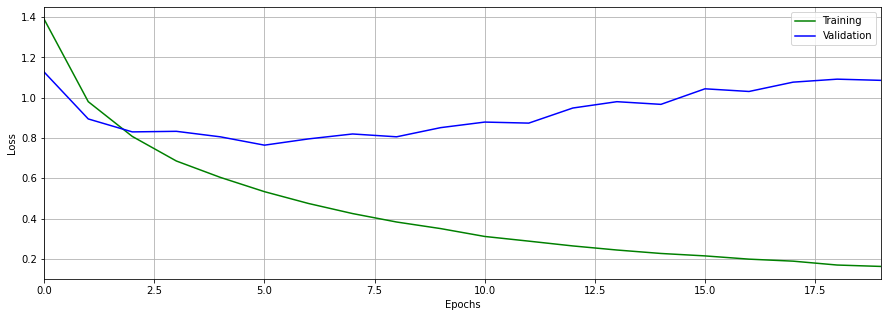

In [58]:
# Plot loss.
if is_training:
    
    plt.figure(figsize=[15,5])

    # Loss plots.    
    plt.plot(training_results.history['loss'], 'g')
    plt.plot(training_results.history['val_loss'], 'b')

    plt.xlim([0.0, training_config.EPOCHS-1])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.legend(['Training', 'Validation'], loc='upper right');
    plt.grid(True)
    plt.show(block=block_plot)

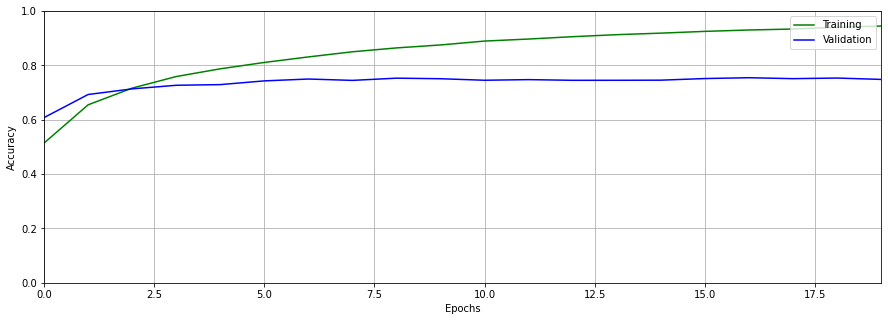

In [59]:
# Plot accuracy.
if is_training:
    
    plt.figure(figsize=[15,5])

    # Loss plots.    
    plt.plot(training_results.history['accuracy'], 'g')
    plt.plot(training_results.history['val_accuracy'], 'b')

    plt.xlim([0.0, training_config.EPOCHS-1])
    plt.ylim([0.0, 1])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.legend(['Training', 'Validation'], loc='upper right');
    plt.grid(True)
    plt.show(block=block_plot)

## 8 Prediction

In [60]:
# Load the saved model.
if dataset == 1:
    cnn_model = tf.keras.models.load_model('models/cifar10_cnn_model.h5')
else:
    cnn_model = tf.keras.models.load_model('models/cifar100_cnn_model.h5')

In [61]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                      

In [62]:
# Preprocess dataset.
((_, _),(X_valid, y_valid),) = preprocess_dataset((X_train_0, y_train_0),
                                                (X_valid_0, y_valid_0),
                                            
                                                num_classes=dataset_config.NUM_CLASSES,
                                               )
    
predictions = cnn_model.evaluate(X_valid, y_valid)
print(f"Validation accuracy: {predictions[1]*100:.3f}%")

There are 50000 training examples 
There are 10000 validation examples
Image data shape is (32, 32, 3)
There are 10 classes
There are 10 classes


X_train: (50000, 32, 32, 3), Y_train: (50000, 10)
X_validation: (10000, 32, 32, 3), Y_valid: (10000, 10)
313/313 [==============================] - 2s 5ms/step - loss: 1.0307 - accuracy: 0.7545
Validation accuracy: 75.450%


## 9 Inference

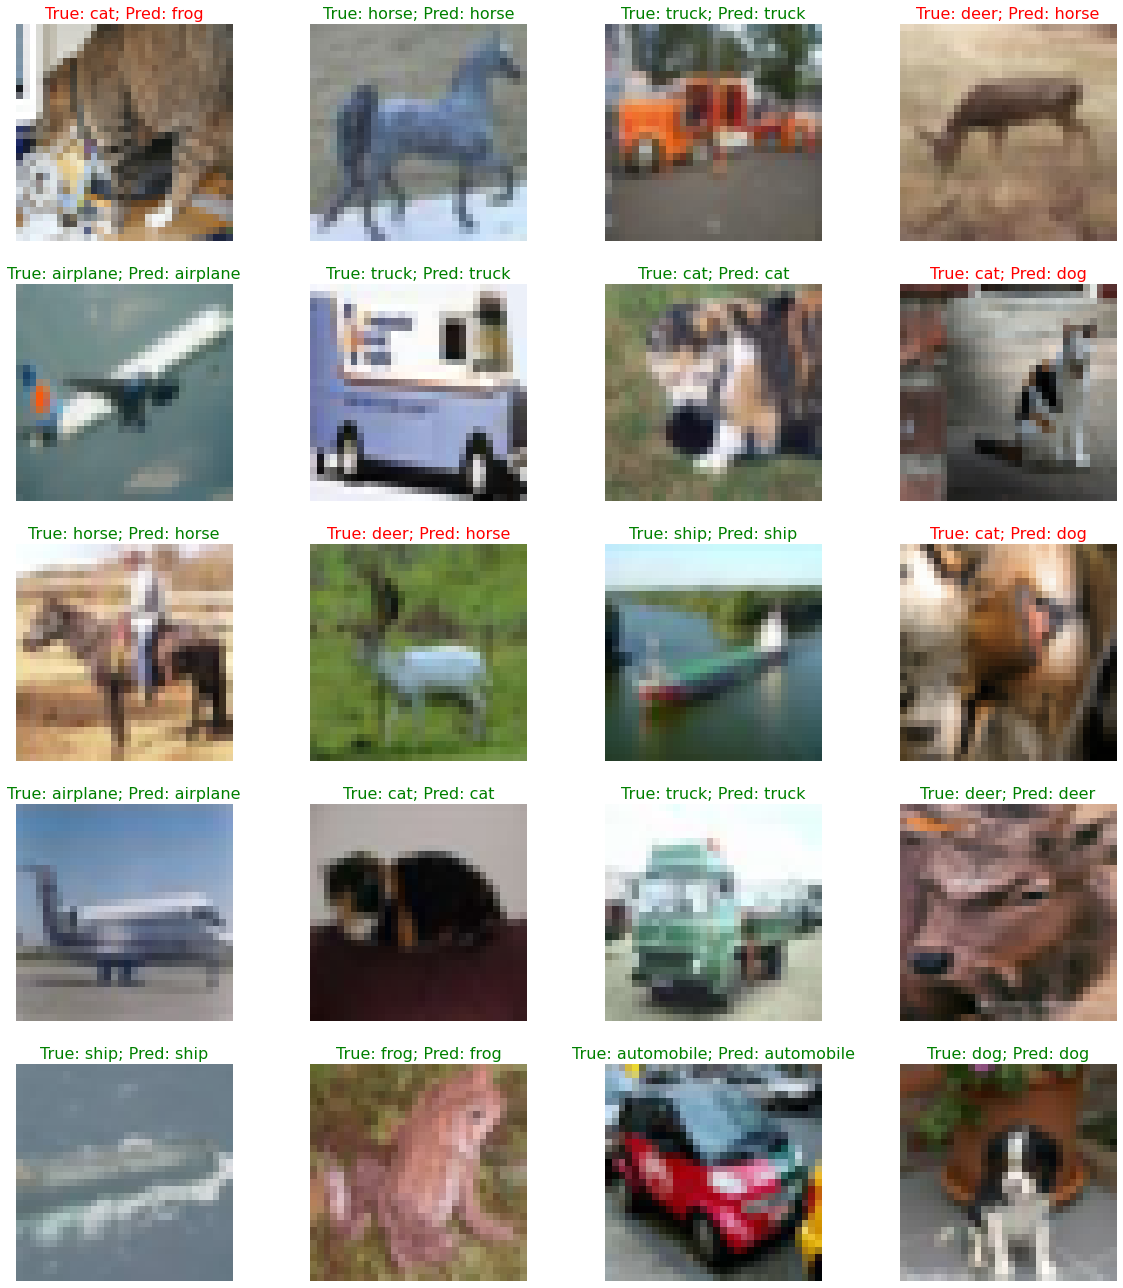

In [63]:
y_pred = cnn_model.predict(X_valid)

plt.figure(figsize=(20, 18))
num_rows = 5
num_cols = 4

for idx in range(num_rows*num_cols):
    
    random_sample = np.random.randint(0, 10000, 1)[0]
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.axis('off')
    plt.imshow(X_valid_0[random_sample])
    gt_class = class_names[int(y_valid_0[random_sample])]
    pred_class = class_names[np.argmax(y_pred[random_sample])]
    
    title = 'True: ' + str(gt_class) + '; Pred: ' + str(pred_class)
    title_obj = plt.title(title, fontdict={'fontsize':16})
        
    if gt_class == pred_class:
        plt.setp(title_obj, color='g')
    else:
        plt.setp(title_obj, color='r')
    
    plt.tight_layout()
    plt.subplots_adjust(left=0.2, right=1.0, wspace=0.1, hspace=0.2)
    
plt.show(block=block_plot)

## 10 Report Your Findings
* ...
* ...